In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Path ke direktori dataset
train_dir = "./dataset/hsv_masking/train"
validation_dir = "./dataset/rgb/val"

In [3]:
# Parameter augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load data latih
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

# Load data validasi
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

Found 1252 images belonging to 3 classes.
Found 315 images belonging to 3 classes.


In [4]:
# Define the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

<ipython-input-4-70eda4ad62ba>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(300, 300, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [5]:
# Checkpoint
filepath = "./models/Baru/MobileNetV2-HSV.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
callback_list = [checkpoint]

# Train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    callbacks=callback_list)

# Save the final model
model.save("./models/Baru/MobileNetV2-HSV.h5")

Epoch 1/50


c:\Users\CATUR WARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6059 - loss: 1.1347 - precision: 0.6407 - recall: 0.5200
Epoch 1: val_loss improved from inf to 0.17987, saving model to ./models/Baru/MobileNetV2-HSV.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 200s 8s/step - accuracy: 0.6128 - loss: 1.1116 - precision: 0.6479 - recall: 0.5277 - val_accuracy: 0.9714 - val_loss: 0.1799 - val_precision: 0.9838 - val_recall: 0.9651
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9023 - loss: 0.2113 - precision: 0.9293 - recall: 0.8865
Epoch 2: val_loss improved from 0.17987 to 0.02527, saving model to ./models/Baru/MobileNetV2-HSV.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 155s 7s/step - accuracy: 0.9033 - loss: 0.2092 - precision: 0.9300 - recall: 0.8879 - val_accuracy: 0.9968 - val_loss: 0.0253 - val_precision: 0.9968 - val_recall: 0.9968
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9369 - loss: 0.1124 - precision: 0.9542 - recall: 0.9338
Epoch 3: val_loss improved from 0.02527 to 0.01464,

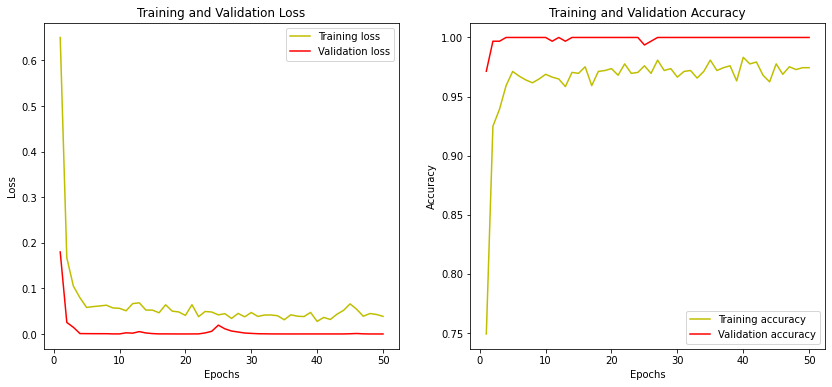

In [6]:
# Plotting
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Training and Validation Loss
ax1.plot(epochs, loss, 'y', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plotting Training and Validation Accuracy
ax2.plot(epochs, acc, 'y', label='Training accuracy')
ax2.plot(epochs, val_acc, 'r', label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()